# <font color = yellow>**Youtube影片語音辨識**

- <font color = orange> 套件安裝

In [ ]:
# 安裝whisper語音辨識工具
!pip install -U openai-whisper

# 安裝youtube套件
!pip install pytube

# 安裝yt-dlp套件，yt影片下載器
!pip install yt-dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.5/800.5 kB 18.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/

- <font color = orange> 抓取影片

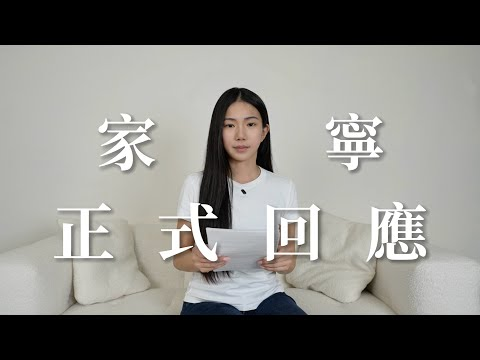

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo('qXwt67lyhsM')

- <font color = orange>取得影片資訊（確認）

In [ ]:
import yt_dlp

url = 'https://www.youtube.com/watch?v=qXwt67lyhsM'

ydl_opts = {
    'quiet': True,
    'skip_download': True,
    'forcejson': True
}

with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    info_dict = ydl.extract_info(url, download=False)
    print("影片標題：", info_dict.get('title'))

影片標題： 家寧正式回應


- <font color = orange>下載影片

In [ ]:
ydl_opts = {
    'format': 'bestaudio/best',
    'outtmpl': 'test_audio.%(ext)s',
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': 'm4a',      # .m4a更適合Whisper使用
        'preferredquality': '192',
    }]
}

with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    ydl.download([url])


[youtube] Extracting URL: https://www.youtube.com/watch?v=qXwt67lyhsM
[youtube] qXwt67lyhsM: Downloading webpage
[youtube] qXwt67lyhsM: Downloading tv client config
[youtube] qXwt67lyhsM: Downloading player 363db69b
[youtube] qXwt67lyhsM: Downloading tv player API JSON
[youtube] qXwt67lyhsM: Downloading ios player API JSON
[youtube] qXwt67lyhsM: Downloading m3u8 information
[info] qXwt67lyhsM: Downloading 1 format(s): 251
[download] Destination: test_audio.webm
[download] 100% of    3.18MiB in 00:00:00 at 8.47MiB/s   
[ExtractAudio] Destination: test_audio.m4a
Deleting original file test_audio.webm (pass -k to keep)


- <font color = orange>套用Whisper模型

In [ ]:
import whisper

model = whisper.load_model("large")
result = model.transcribe("test_audio.m4a", language="zh")

print(result["text"])

100%|█████████████████████████████████████| 2.88G/2.88G [01:04<00:00, 47.9MiB/s]


親愛的朋友粉絲們大家好我是佳寧這段時間無論是作為女兒夥伴還是創作者這一切對我來說都不容易我始終珍惜身邊的每一段關係也感謝這些年來一路相伴的家人夥伴及支持我的朋友和粉絲們對於這次的風波我深感遺憾因為這不只是關於公司與個人的問題更是關係到親情與夥伴情誼這段時間我並非選擇逃避而是希望能夠以最負責任的態度去釐清問題去尋求最適當的解決方式我理解大家的關心也感受到各方來致的期待因此想透過這封聲明讓大家了解我的立場與心境一直以來我對於財務方面的細節有所疑問這並非近期才開始關注的事情數年間我曾多次詢問並希望獲得更清楚的資訊以確保自己能夠對公司與個人的發展負責然而至今我能為獲得完整的數據這也是我選擇與專業人士諮詢並努力釐清相關狀況的原因我深信透明與公平是合作的基石因此我希望透過合適的法律程序確保所有的權益與責任都能夠得到合理的處理關於頻道的營運與收入分配過去我更專注於創作將心力投入在內容的產出上卻在這段時間內我實在是不太清楚自己對於財務與經營層面的認識還不夠深入我願意以更成熟的態度學習並確保未來能夠有更清新的規劃與管理在個人關係上我尊重並珍惜過去的每一段經歷也希望彼此都能夠在未來擁有更好的發展分手後我一直努力維持彼此的距離避免不必要的爭議在這裡我想誠實的請求大家給予我們彼此一些空間讓我們能夠用最適合的方式走向各自更好的未來這些年我始終堅持以真誠的態度經營頻道也相信大家能夠看到我的努力我不希望這些傳聞影響到支持我的朋友們因此才選擇站出來說明這次的事件讓我學到了許多作為公眾人物我應該更早意識到經營管理的重要性也應該更早學會如何在事業與家庭之間取得平衡我真誠的向所有因這次事件受到影響的人致歉無論是家人合作夥伴還是一直支持我的你們在未來的路上我帶著這次經驗會更加獨立成長勇敢也更加珍惜每一份支持與陪伴謝謝你們一直以來的關心與鼓勵這份溫暖是我們前進的動力希望我們都能夠在這次風波後迎來更明朗的未來謝謝大家


- <font color = orange>逐句印出

In [ ]:
for segment in result["segments"]:
    start = segment["start"]
    end = segment["end"]
    text = segment["text"]
    print(f"[{start:.2f} → {end:.2f}] {text}")

[0.00 → 2.56] 親愛的朋友粉絲們大家好
[2.56 → 4.44] 我是佳寧
[4.44 → 5.84] 這段時間
[5.84 → 7.64] 無論是作為女兒
[7.64 → 8.44] 夥伴
[8.44 → 10.24] 還是創作者
[10.24 → 12.54] 這一切對我來說
[12.54 → 14.08] 都不容易
[14.08 → 17.32] 我始終珍惜身邊的每一段關係
[17.32 → 20.68] 也感謝這些年來一路相伴的家人
[20.68 → 21.62] 夥伴
[21.62 → 25.46] 及支持我的朋友和粉絲們
[25.46 → 27.40] 對於這次的風波
[27.40 → 29.16] 我深感遺憾
[29.16 → 31.72] 因為這不只是關於公司
[31.72 → 34.16] 與個人的問題
[34.16 → 36.34] 更是關係到親情
[36.34 → 38.24] 與夥伴情誼
[38.24 → 39.64] 這段時間
[39.64 → 41.70] 我並非選擇逃避
[41.70 → 44.98] 而是希望能夠以最負責任的態度
[44.98 → 46.82] 去釐清問題
[46.82 → 50.32] 去尋求最適當的解決方式
[50.32 → 52.62] 我理解大家的關心
[52.62 → 55.72] 也感受到各方來致的期待
[55.72 → 57.92] 因此想透過這封聲明
[57.92 → 58.92] 讓大家了解
[58.92 → 61.22] 我的立場與心境
[61.22 → 62.76] 一直以來
[62.76 → 65.96] 我對於財務方面的細節有所疑問
[65.96 → 69.54] 這並非近期才開始關注的事情
[69.54 → 71.20] 數年間
[71.20 → 72.74] 我曾多次詢問
[72.74 → 75.56] 並希望獲得更清楚的資訊
[75.56 → 78.38] 以確保自己能夠對公司
[78.38 → 80.68] 與個人的發展負責
[80.68 → 82.08] 然而至今
[82.08 → 84.78] 我能為獲得完整的數據
[84.78 → 88.48] 這也是我選擇與專業人士諮詢
[88.92 → 93.02] 並努力釐清相關狀況的原因
[93.02 → 97.36] 我深

- <font color = orange>存檔：存成逐句分段的文字

In [ ]:
with open("segments.txt", "w", encoding="utf-8") as f:
    for seg in result["segments"]:
        f.write(f"[{seg['start']:.2f} → {seg['end']:.2f}] {seg['text']}\n")

- <font color = orange>存檔：存成JSON（含完整結構）

In [ ]:
import json

with open("result.json", "w", encoding="utf-8") as f:
    json.dump(result, f, ensure_ascii=False, indent=2)

# <font color = yellow>**字幕.srt檔生成工具**

- <font color = orange>安裝套件

In [ ]:
!pip install -U openai-whisper
!sudo apt update && sudo apt install -y ffmpeg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.5/800.5 kB 15.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s 

- <font color = orange>輸入影音檔案

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.mov to test.mov


- <font color = orange>字幕生成

In [ ]:
import whisper
import os
from datetime import timedelta
import subprocess
from google.colab import files

# 輸入影片檔名
filename = list(uploaded.keys())[0]
base_name = os.path.splitext(filename)[0]

# 轉成 mp3 音訊（確保 Whisper 能辨識）
audio_file = f"{base_name}_audio.mp3"
!ffmpeg -y -i "{filename}" -vn -acodec libmp3lame "{audio_file}"

# 進行語音辨識
model = whisper.load_model("large")
result = model.transcribe(audio_file, language="en")  # zh=中文，en=英文

# 產出 SRT 字幕檔
srt_filename = f"{base_name}.srt"

def format_srt_timestamp(seconds):
    milliseconds = int(seconds * 1000)
    hours = milliseconds // (3600 * 1000)
    minutes = (milliseconds % (3600 * 1000)) // (60 * 1000)
    secs = (milliseconds % (60 * 1000)) // 1000
    ms = milliseconds % 1000
    return f"{hours:02}:{minutes:02}:{secs:02},{ms:03}"

with open(srt_filename, "w", encoding="utf-8") as f:
    for i, seg in enumerate(result["segments"], 1):
        if seg["avg_logprob"] < -1.0 or seg["no_speech_prob"] > 0.6:
            continue
        start = format_srt_timestamp(seg["start"])
        end = format_srt_timestamp(seg["end"])
        text = seg["text"].strip()
        f.write(f"{i}\n{start} --> {end}\n{text}\n\n")

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

100%|█████████████████████████████████████| 2.88G/2.88G [01:08<00:00, 44.9MiB/s]


- <font color = orange>存檔：字幕.srt檔

In [ ]:
from google.colab import files
files.download(srt_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>